# DBSCAN clustering

DBSCAN is a density-based models: These models define clusters by their density in the data space. Areas with a high density of data points will become clusters, which are typically separated from one another by low-density areas.

The density-based spatial clustering of applications with noise (DBSCAN) algorithm groups together points that are close to each other (with many neighbors) and marks those points that are further away with no close neighbors as outliers.

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import pandas as pd

# Model
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Plotting
import matplotlib.pyplot as plt

# Warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
dataset = pd.read_csv(f"{data_path}/circles.csv")

<a id="exploring-data"></a>
## Exploring dataset

In [4]:
# Shape of the dataset
print("Shape of the dataset: ", dataset.shape)
# Head
dataset

Shape of the dataset:  (1500, 2)


0         1
0     0.393992 -0.416376
1     0.528243 -0.828242
2    -0.740158  0.607730
3    -0.971016  0.316821
4     0.018693 -0.605288
...        ...       ...
1495  0.085197 -0.463028
1496  0.890820  0.003483
1497  0.223768 -0.419122
1498  0.221189 -0.510314
1499  0.544376  0.049358

[1500 rows x 2 columns]

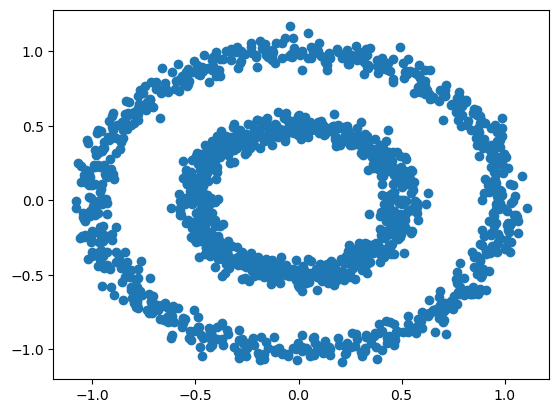

In [5]:
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1])
plt.show()

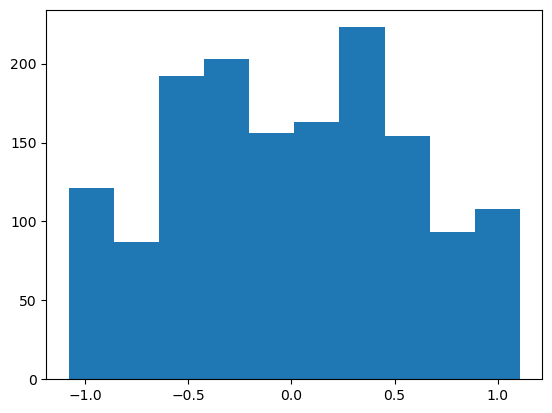

In [6]:
# Using slicing to select the feature
plt.hist(dataset.iloc[:, 0])
plt.show()

<a id="dbscan"></a>
## DBSCAN

In [7]:
# Instantiate with an eps (the maximum distance that defines the
# radius within which the algorithm searches for neighbors) of 0.1
# - the value chosen after trying out all other possible values
est_dbscan = DBSCAN(eps=0.1)
# Fit the model to the data and assign a cluster to each data point
pred_dbscan = est_dbscan.fit_predict(dataset)

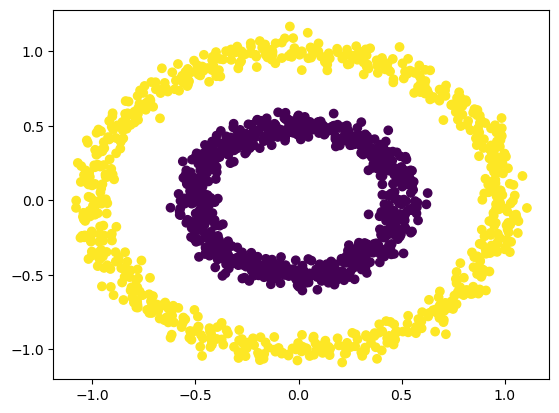

In [8]:
# Plot the results from the clustering process
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=pred_dbscan)
plt.savefig(f"{assets_path}/circles-dbscan.png", bbox_inches="tight")
plt.show()

<a id="metrics"></a>
## Metrics

In [9]:
# Silhouette
dbscan_silhouette_score = silhouette_score(
    dataset, pred_dbscan, metric="euclidean"
)
print(dbscan_silhouette_score)

0.11394082711912518


In [10]:
# Calinski_harabasz
dbscan_calinski_harabasz_score = calinski_harabasz_score(dataset, pred_dbscan)
print(dbscan_calinski_harabasz_score)

0.0017164732936172393
